## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv("QueryResults.csv", names=["Date","Tag","Post"],header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
# First 5 rows:
df.head()

,Date,Tag,Post
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [4]:
# Last 5 rows
df.tail()

,Date,Tag,Post
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

Date    1991
Tag     1991
Post    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
# Calculate the total number of post per language
num_post_per_lang = df.groupby("Tag").sum()
num_post_per_lang

,Post
Tag,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [8]:
# Which Programming language has had the highest total number of posts of all time?
num_post_per_lang.idxmax()[0]

'javascript'

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [9]:
# How many months of data exist per language?
month_of_data_per_lang = df.groupby("Tag").count()
month_of_data_per_lang

,Date,Post
Tag,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [10]:
# Which language had the fewest months with an entry?
month_of_data_per_lang.idxmin()[0]

'go'

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [11]:
# checking the data type of Date
print(df.Date[1])
print("data type of Date: ",type(df.Date[1]))

2008-08-01 00:00:00
data type of Date:  <class 'str'>


In [12]:
# changing datatype of Date to timestamp
df.Date = pd.to_datetime(df["Date"])
print("data type of Date: ",type(df.Date[1]))
df.head()

data type of Date:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Date,Tag,Post
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [13]:
# The .pivot() method-Sometimes you want to convert your DataFrame so that each category has its own column

In [14]:
# pivot the df DataFrame so that each row is a date and each column is a programming language?
reshaped_df = df.pivot("Date","Tag","Post")

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [15]:
# What are the dimensions of our new dataframe? How many rows and columns does it have? 
reshaped_df.shape

(145, 14)

In [16]:
# Print out the column names
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [17]:
# first 5 rows of the the dataframe 
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [18]:
# Count the number of entries per programming language.
reshaped_df.count()

Tag
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [19]:
# Dealing with NaN Values
reshaped_df.fillna(0,inplace=True)
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [20]:
# checking if there is any more Not a Number using isna().values.any() - which check if there is any NAN in the whole dataframe
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

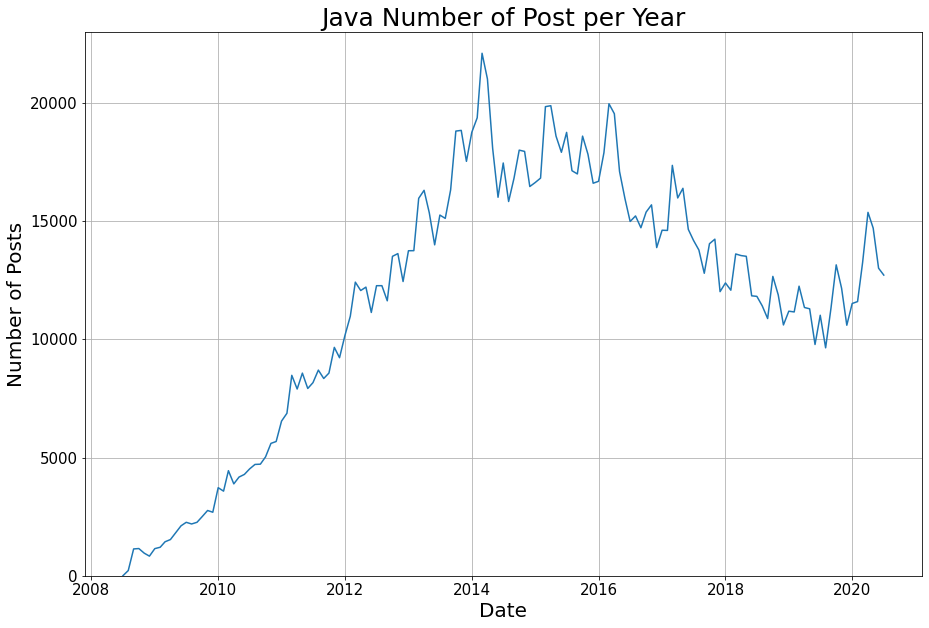

In [21]:
# plot a single programming language (e.g., java) on a chart.
plt.figure(figsize=(15,10))
plt.plot(reshaped_df.index, reshaped_df.java)
plt.title("Java Number of Post per Year", fontsize=25)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Number of Posts",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,23000)
plt.grid()
plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

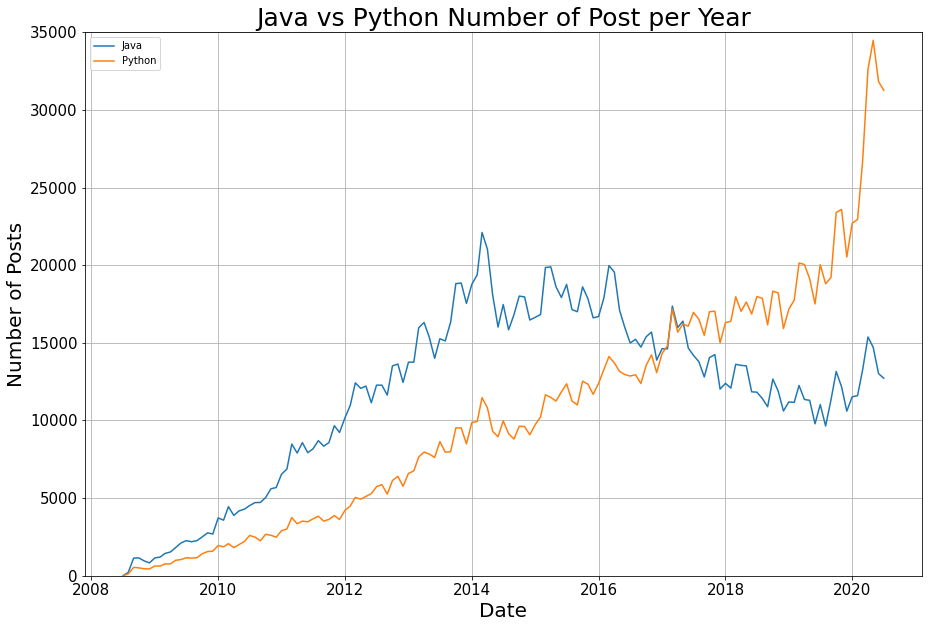

In [22]:
# plot Two programming language (e.g., Java and Python) on a chart.
plt.figure(figsize=(15,10))
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)
plt.legend(["Java","Python"])
plt.title("Java vs Python Number of Post per Year", fontsize=25)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Number of Posts",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,35000)
plt.grid()
plt.show()

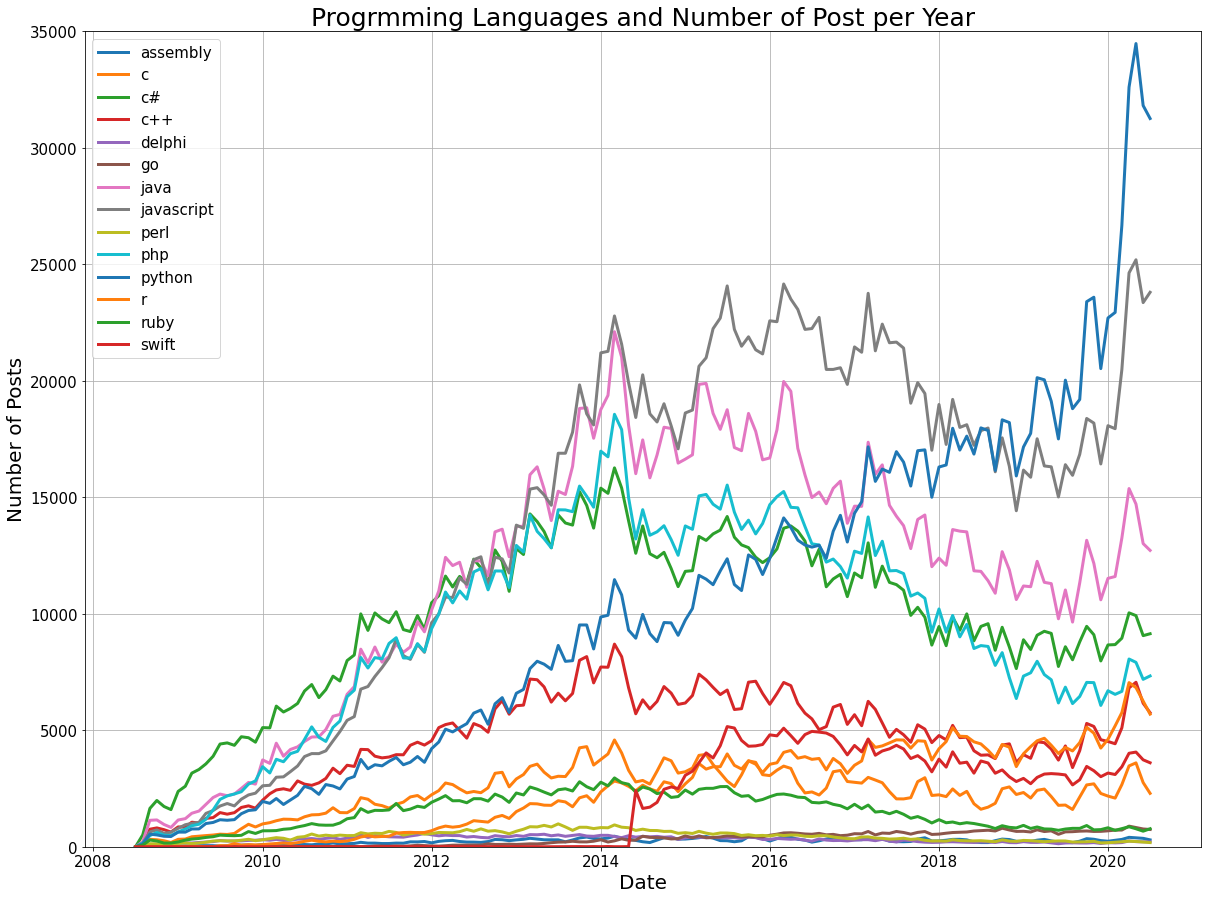

In [23]:
# ploting all Programming languages in the graph
plt.figure(figsize=(20,15))

for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3)

plt.title("Progrmming Languages and Number of Post per Year", fontsize=25)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Number of Posts",fontsize=20)
plt.legend(reshaped_df.columns, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,35000)
plt.grid()
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

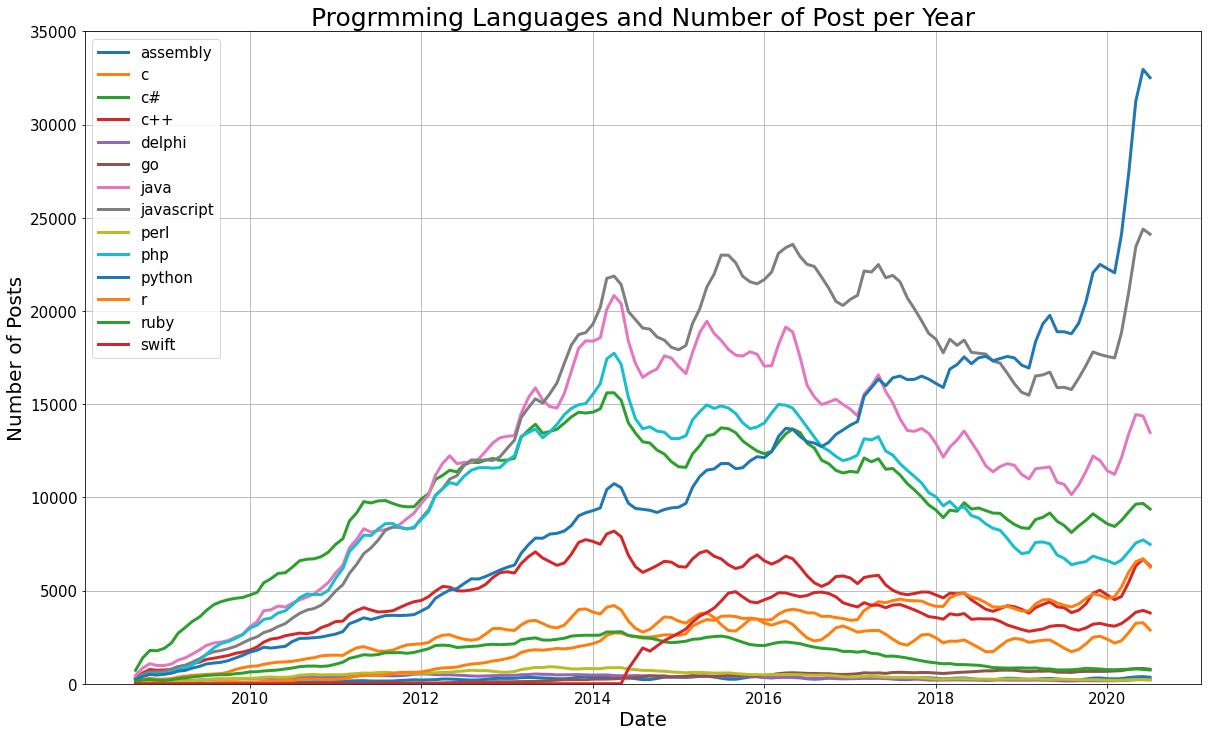

In [24]:
# Smoothing out Time Series Data using rolling mean

# rolling mean with window 3
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(20,12))

for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3)

plt.title("Progrmming Languages and Number of Post per Year", fontsize=25)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Number of Posts",fontsize=20)
plt.legend(reshaped_df.columns, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,35000)
plt.grid()
plt.show()

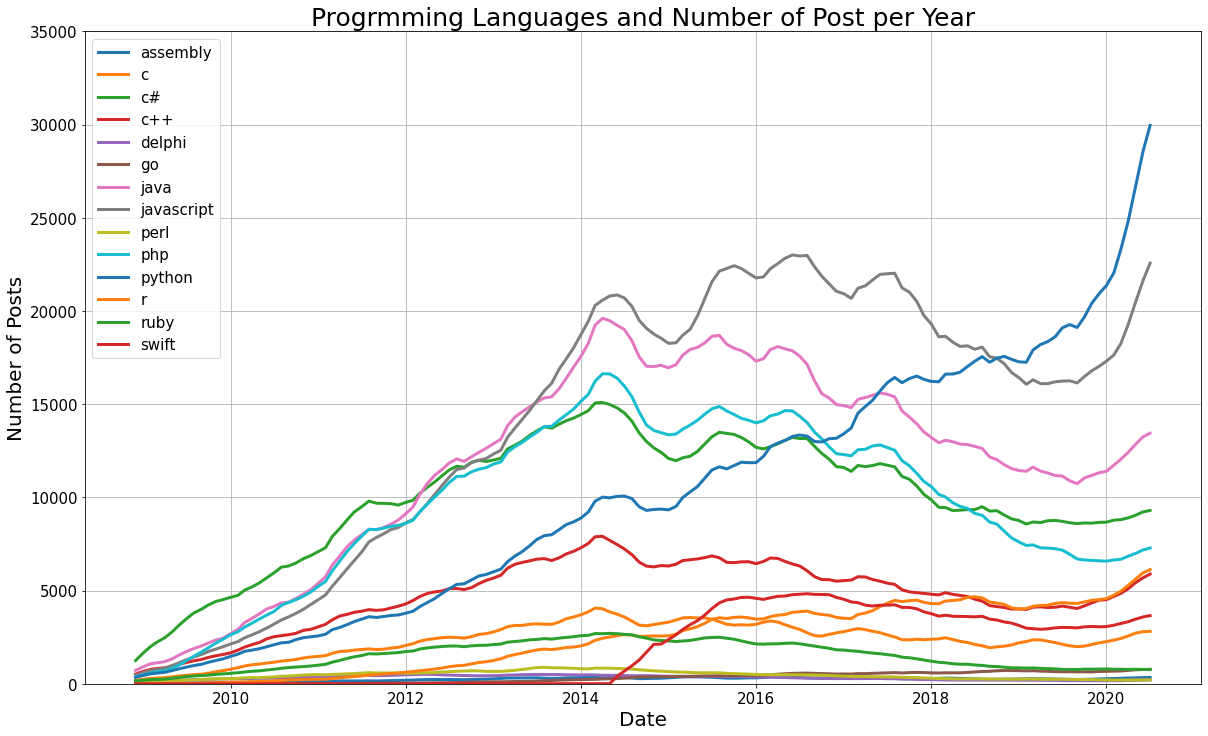

In [25]:
# rolling mean with window 6
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(20,12))

for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3)

plt.title("Progrmming Languages and Number of Post per Year", fontsize=25)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Number of Posts",fontsize=20)
plt.legend(reshaped_df.columns, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,35000)
plt.grid()
plt.show()

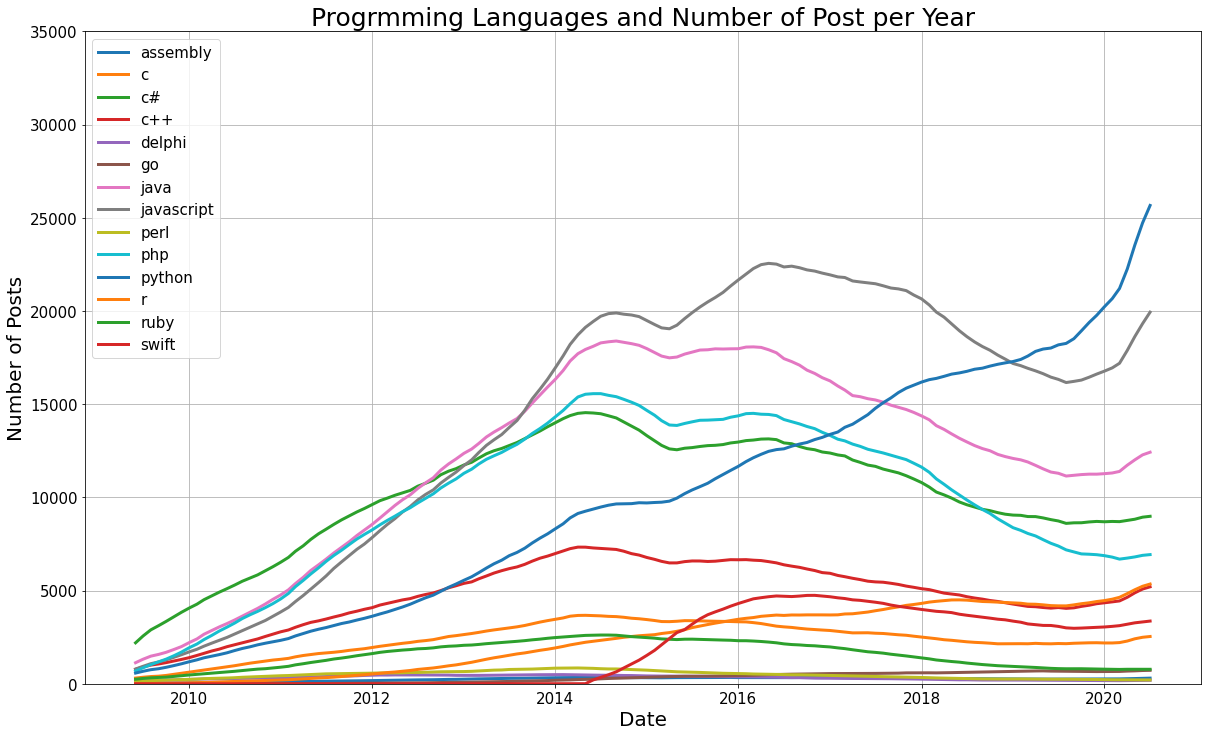

In [26]:
# rolling mean with window 12
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(20,12))

for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3)

plt.title("Progrmming Languages and Number of Post per Year", fontsize=25)
plt.xlabel("Date",fontsize=20)
plt.ylabel("Number of Posts",fontsize=20)
plt.legend(reshaped_df.columns, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,35000)
plt.grid()
plt.show()

# Learning Points & Summary
1. used .groupby() to explore the number of posts and entries per programming language

2. converted strings to Datetime objects with to_datetime() for easier plotting

3. reshaped our DataFrame by converting categories to columns using .pivot()

4. used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()

5. created (multiple) line charts using .plot() with a for-loop

6. styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

7. added a legend to tell apart which line is which by colour

8. smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.